In [1]:
import warnings
import time
warnings.filterwarnings('ignore')

# Preprocessing

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')
y = df['Survived']
df = df.drop(columns=['Survived','Cabin','Name','Ticket','PassengerId'])

In [4]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [5]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [6]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df['Age'].fillna(df['Age'].median(),inplace=True)

In [7]:
df.isnull().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [8]:
train = [df]
for data in train:
    data.loc[data['Sex']=='female','Sex'] = 0
    data.loc[data['Sex']=='male','Sex'] = 1

In [9]:
for data in train:
    data.loc[data['Embarked']=='S','Embarked'] = 0
    data.loc[data['Embarked']=='Q','Embarked'] = 1
    data.loc[data['Embarked']=='C','Embarked'] = 2

In [10]:
scaler = StandardScaler()
params=['Age', 'Fare', 'Parch', 'Pclass', 'SibSp']
for name in params:
    df[name] = df[name].astype('float64')
    df[name] = scaler.fit_transform(df[name].values.reshape(-1,1))

In [11]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,1,-0.565736,0.432793,-0.473674,-0.502445,0
1,-1.566107,0,0.663861,0.432793,-0.473674,0.786845,2
2,0.827377,0,-0.258337,-0.474545,-0.473674,-0.488854,0
3,-1.566107,0,0.433312,0.432793,-0.473674,0.420730,0
4,0.827377,1,0.433312,-0.474545,-0.473674,-0.486337,0


In [12]:
(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(df, y, train_size=0.8, test_size=0.2, random_state=1)

# Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [14]:
clf = DecisionTreeClassifier()
start = time.time()
clf.fit(train_inputs,train_classes)
end = time.time()
print("Time: " + str(round(end - start,5)))
print("Acc: " + str(round(clf.score(test_inputs,test_classes),2)))


Time: 0.00397
Acc: 0.77


In [15]:
import graphviz

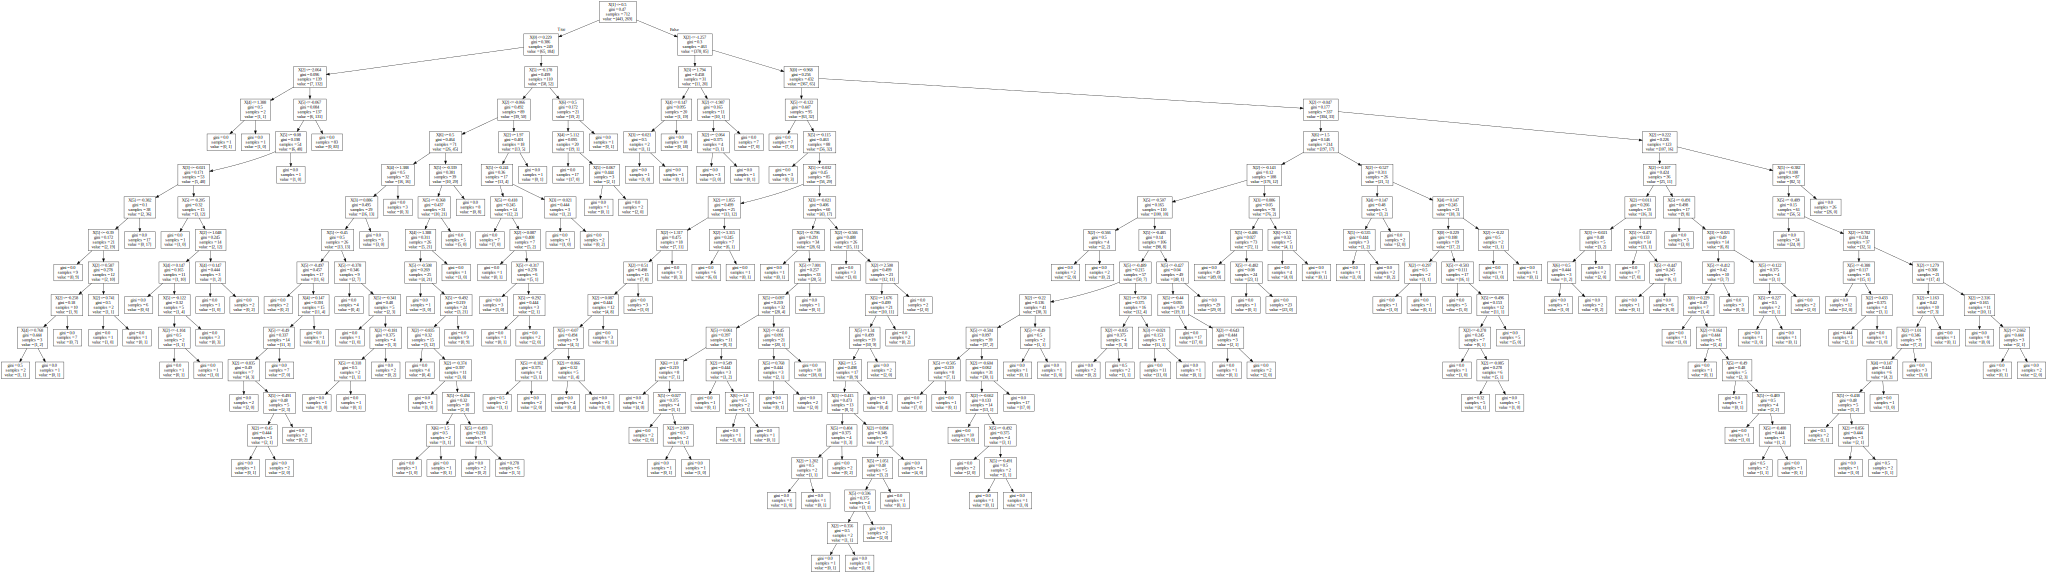

In [16]:
dot_data = export_graphviz(clf)
graph = graphviz.Source(dot_data)
graph

In [17]:
# import pydot
# export_graphviz(clf,out_file='graph.dot')
# (graph,) = pydot.graph_from_dot_file('graph.dot')
# graph.write_png('graph.png')

# Boosted Tree

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
clf_gb = GradientBoostingClassifier()
start = time.time()
clf_gb.fit(train_inputs,train_classes)
end = time.time()
print("Time: " + str(round(end - start,2)))
print("Acc: " + str(round(clf_gb.score(test_inputs,test_classes),2)))

Time: 0.06
Acc: 0.79


# Random Forest 

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

In [21]:
start = time.time()
clf_rf = RandomForestClassifier(n_estimators=100)
scoring = 'accuracy'
score = cross_val_score(clf_rf,df,y,cv=k_fold,n_jobs=-1,scoring=scoring)
print("Acc: " + str(round(np.mean(score),2)))
end = time.time()
print("Time: " + str(round(end - start,2)))

Acc: 0.81
Time: 4.2


# SVM

In [22]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

Time: 0.0519


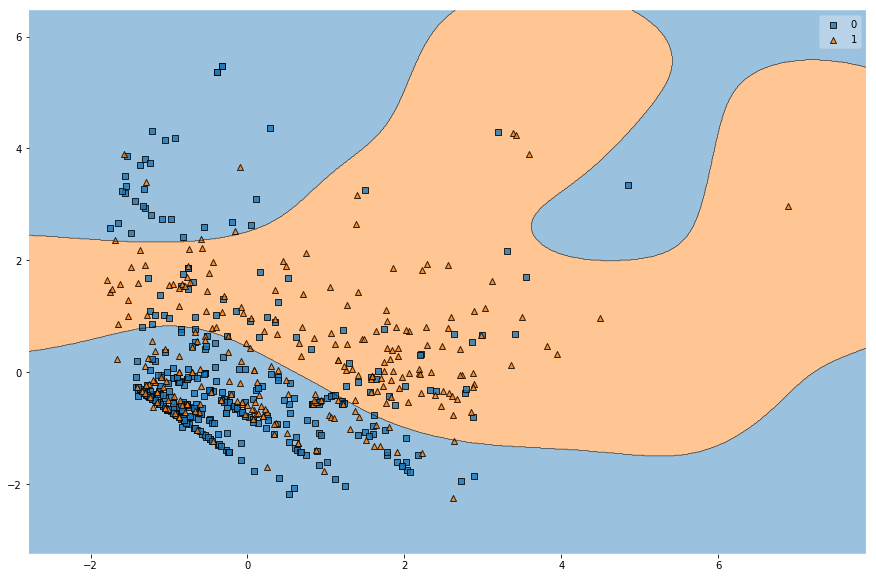

In [23]:
train_inputs_reduced = PCA(n_components = 2).fit_transform(train_inputs)
train_classes_reduced = np.array(train_classes)
train_classes_reduced = train_classes_reduced.astype(np.integer)
clf_svc = SVC()
start = time.time()
clf_svc.fit(train_inputs_reduced,train_classes_reduced)
end = time.time()
print("Time: " + str(round(end - start,4)))
plt.figure(figsize = [15,10])
plot_decision_regions(train_inputs_reduced, train_classes_reduced, clf = clf_svc)

In [24]:
score = cross_val_score(clf_svc,df,y,cv=k_fold,n_jobs=1,scoring='accuracy')
print("Acc: " + str(round(np.mean(score),2)))

Acc: 0.82


# Neural Network

In [25]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [26]:
model = Sequential()
model.add(Dense(8,input_dim=df.shape[1],activation='linear'))
model.add(Dense(4,activation='linear'))
model.add(Dense(4,activation='linear'))
model.add(Dropout(0.01))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model.summary()
from keras.utils import plot_model
plot_model(model, to_file='model.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [28]:
start = time.time()
model_training = model.fit(df, y, epochs=100, batch_size=32, validation_split=0.2)
val_acc = np.mean(model_training.history['val_acc'])
print("Acc: " + str(round(val_acc,2)))
end = time.time()
print("Time: " + str(round(end - start,2)))

Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 0s 438us/step - loss: 0.7301 - acc: 0.5449 - val_loss: 0.6797 - val_acc: 0.6425
Epoch 2/100
712/712 [==============================] - 0s 45us/step - loss: 0.6266 - acc: 0.6952 - val_loss: 0.5840 - val_acc: 0.7318
Epoch 3/100
712/712 [==============================] - 0s 45us/step - loss: 0.5735 - acc: 0.7205 - val_loss: 0.5354 - val_acc: 0.7765
Epoch 4/100
712/712 [==============================] - 0s 39us/step - loss: 0.5528 - acc: 0.7303 - val_loss: 0.5068 - val_acc: 0.7933
Epoch 5/100
712/712 [==============================] - 0s 39us/step - loss: 0.5413 - acc: 0.7360 - val_loss: 0.4864 - val_acc: 0.7989
Epoch 6/100
712/712 [==============================] - 0s 45us/step - loss: 0.5186 - acc: 0.7528 - val_loss: 0.4738 - val_acc: 0.8101
Epoch 7/100
712/712 [==============================] - 0s 39us/step - loss: 0.5168 - acc: 0.7458 - val_loss: 0.4608 - val_acc: 0.8101
Epoch 8/100
712

712/712 [==============================] - 0s 39us/step - loss: 0.4564 - acc: 0.7992 - val_loss: 0.3979 - val_acc: 0.8268
Epoch 62/100
712/712 [==============================] - 0s 39us/step - loss: 0.4617 - acc: 0.7865 - val_loss: 0.3979 - val_acc: 0.8380
Epoch 63/100
712/712 [==============================] - 0s 39us/step - loss: 0.4620 - acc: 0.7809 - val_loss: 0.3953 - val_acc: 0.8324
Epoch 64/100
712/712 [==============================] - 0s 39us/step - loss: 0.4570 - acc: 0.7907 - val_loss: 0.3986 - val_acc: 0.8380
Epoch 65/100
712/712 [==============================] - 0s 39us/step - loss: 0.4580 - acc: 0.7893 - val_loss: 0.3986 - val_acc: 0.8324
Epoch 66/100
712/712 [==============================] - 0s 39us/step - loss: 0.4518 - acc: 0.7978 - val_loss: 0.3962 - val_acc: 0.8268
Epoch 67/100
712/712 [==============================] - 0s 34us/step - loss: 0.4610 - acc: 0.7921 - val_loss: 0.3981 - val_acc: 0.8380
Epoch 68/100
712/712 [==============================] - 0s 39us/step

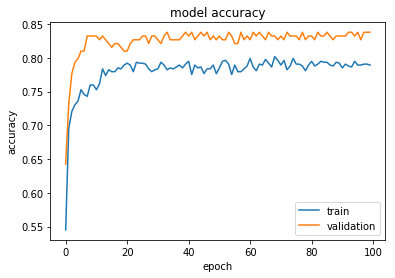

In [29]:
plt.plot(model_training.history['acc'])
plt.plot(model_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='bottom right')
plt.show()